# </br>LIMPIEZA DE DATOS HOMICIDIOS-VICTIMAS

# 1. El problema del proyecto

El Observatorio de Movilidad y Seguridad Vial (OMSV), donde trabajo, como centro de estudios bajo la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, me ha encargado la elaboración de un proyecto de análisis de datos. El objetivo es generar información que permita a las autoridades locales tomar medidas para reducir la cantidad de víctimas fatales en accidentes de tránsito. Para ello, me han proporcionado un conjunto de datos en formato xlsx que detalla los homicidios en siniestros viales ocurridos en la Ciudad de Buenos Aires entre 2016 y 2021. Este conjunto de datos consta de dos hojas, "hechos" y "víctimas", y también incluye dos hojas adicionales con diccionarios de datos para facilitar la comprensión de la información proporcionada.

# 2. los Set de datos

La información recolectada por el OMSV se encuentran el archivo `homicidios.xlsx`

* `homicidios.xlsx` - Hoja: VICTIMA. Cuenta con 17 Columnas y 717 filas
Cada registro contiene 17 características o columnas.  Las columnas son:
1. "ID_hecho":	identificador unico del siniestro
2. "FECHA":	fecha en formato dd/mm/aaaa
3. "AAAA":	año
4. "MM":	mes
5. "DD":	día del mes
6. "ROL":	Posición relativa al vehículo que presentaba la víctima en el momento del siniestro
7. "VICTIMA":	Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
8. "SEXO":	Sexo informado por fuente policial de la víctima
9. "EDAD":	Edad de la víctima al momento del siniestro
10. "FECHA_FALLECIMIENTO":	Fecha de fallecimiento de la víctima

# 3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

Revisando la hoja: VICTIMAS en el archivo de homicidios.xls

In [2]:

# Nombre del archivo Excel
archivo_excel = 'homicidios.xlsx'

# Leer el archivo Excel y cargarlo en un DataFrame
df_homicidios_V= pd.read_excel(archivo_excel, sheet_name='VICTIMAS')

# Suponiendo que 'df' es tu DataFrame
dimensiones = df_homicidios_V.shape

# Obtener el número de filas y columnas
num_filas = dimensiones[0]
num_columnas = dimensiones[1]

# Imprimir las dimensiones
print("Número de filas del Dataset homicidios VICTIMAS:", num_filas)
print("Número de columnas del Dataset homicidios VICTIMAS:", num_columnas)
# Vemos el encabezado con pocas filas
df_homicidios_V.head()

Número de filas del Dataset homicidios VICTIMAS: 717
Número de columnas del Dataset homicidios VICTIMAS: 10


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [3]:
# Veamos las variables categóricas y las numéricas
df_homicidios_V.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Transformaciones
2. Datos faltantes en algunas celdas
3. Columnas irrelevantes (que no responden al problema que queremos resolver)
4. Registros (filas) repetidos
5. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
6. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Transformaciones


Conversión del tipo de dato

In [4]:
#Cambio la columna a tipo datetime
df_homicidios_V["FECHA_FALLECIMIENTO"] = pd.to_datetime(df_homicidios_V["FECHA_FALLECIMIENTO"], format='%Y-%m-%d', errors='coerce')

In [5]:
#Una vez que se paso el tipo de dato a datetime que es una fecha y hora completa se utiliza este codigo para que solo se quede en formato fecha sin hora
df_homicidios_V["FECHA_FALLECIMIENTO"] = df_homicidios_V["FECHA_FALLECIMIENTO"].dt.date

#Luego se reemplazan las fechas en cero con espacios vacios a fin de su manipulación
df_homicidios_V["FECHA_FALLECIMIENTO"] = df_homicidios_V ["FECHA_FALLECIMIENTO"].replace(pd.NaT,"")

In [6]:
#Cambio la columna edad a numerico y luego a tipo entero
df_homicidios_V["EDAD"] = pd.to_numeric(df_homicidios_V["EDAD"], errors="coerce")
df_homicidios_V ["EDAD"] = df_homicidios_V["EDAD"].astype("Int64")

In [7]:
#Utilizo Numpy para reemplazar por NaN los sin datos o vacios y luego paso a float para que cuando quiera aplicar estadisticas no tenga errores debido a esos datos
df_homicidios_V["EDAD"] = df_homicidios_V["EDAD"].replace([" ","SD"], np.nan)

In [8]:
df_homicidios_V["EDAD"] = df_homicidios_V["EDAD"].fillna(0.0)

In [9]:
#Controlo los datos de la columna
df_homicidios_V ["EDAD"].unique()

<IntegerArray>
[19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20, 54,  0,
 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40, 87, 76, 75, 35, 80,
 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39, 28,  7, 48,  4, 82, 32, 17,
 47, 61, 10, 95, 73, 84, 66, 85,  1, 15, 13, 77, 44, 31, 62, 74, 71, 11, 86,
 69, 72, 12, 63, 92, 68, 91, 64,  5, 88]
Length: 86, dtype: Int64

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pero vemos que no hay regitros nulos, sin embargo se ejecuta la línea que se encarga de eliminar registros de columnas.

In [10]:
df_homicidios_V.dropna(inplace=True)
df_homicidios_V.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    Int64         
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: Int64(1), datetime64[ns](1), int64(3), object(5)
memory usage: 62.3+ KB


conserva la totalidad de registros.

In [11]:
df_homicidios_V.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


In [12]:
df_homicidios_V.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**. 
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [13]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ROL', 'VICTIMA', 'SEXO','EDAD', 'VICTIMA', 'FECHA_FALLECIMIENTO' ]
for col in cols_cat:
  print(f'Columna {col}: {df_homicidios_V[col].nunique()} subniveles')

Columna ROL: 5 subniveles
Columna VICTIMA: 8 subniveles
Columna SEXO: 3 subniveles
Columna EDAD: 86 subniveles
Columna VICTIMA: 8 subniveles
Columna FECHA_FALLECIMIENTO: 562 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [14]:
df_homicidios_V.describe()

,AAAA,MM,DD,EDAD
count,717.000000,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948,39.050209
std,1.672655,3.575140,8.683358,22.010669
min,2016.000000,1.000000,1.000000,0.000000
25%,2017.000000,4.000000,9.000000,24.000000
50%,2018.000000,7.000000,16.000000,35.000000
75%,2019.000000,10.000000,23.000000,55.000000
max,2021.000000,12.000000,31.000000,95.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

Se crea la columna `Rango etario` basada en la columna `Edad`, para mejorar el análisis de los datos 

In [15]:
# Se utiliza la función `pd.cut()`, que permite agrupar valores numéricos en intervalos o categorías
                                                                                                            
categorias_edad = df_homicidios_V['EDAD'].value_counts()
# Definir los límites de los rangos etarios y las etiquetas
bins = [0, 20, 40, 60, 80, 100]
labels = ['Menos de 20', ' Entre 21- 40', 'Entre 41-60', 'Entre 61-80', 'Más de 80']

# Utilizar pd.cut() para crear la columna de rango etario
df_homicidios_V['Rango_Edad'] = pd.cut(df_homicidios_V['EDAD'], bins=bins, labels=labels, right=False)

df_homicidios_V.head(3)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Rango_Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,Menos de 20
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,Entre 61-80
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,Entre 21- 40


A continuación se estandarizan las mayúsculas y minúsculas del dataset

In [16]:
# Se coloca la primera en mayúscula
df_homicidios_V.columns = [x.capitalize() for x in df_homicidios_V.columns]
# Se reemplazan los guiones por espacios
df_homicidios_V.columns = df_homicidios_V.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_homicidios_V = df_homicidios_V.rename(columns={'Id hecho': 'Id',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Día',
                                                      'Victima':'Víctima'})
df_homicidios_V.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Día', 'Rol', 'Víctima', 'Sexo', 'Edad',
       'Fecha fallecimiento', 'Rango edad'],
      dtype='object')

## 4.3 Filas repetidas 

A partir de los datos, se analiza eliminar columnas que se repiten en ambos dataset para realizar luego la unión y trabajar con un conjunto de datos.
Se proceden a eliminar del dataset `df_homicidios_V` las columnas `Fecha`, `Año`, `Mes`, `Día` y `Victima` que contienen la misma información que se encuentra en `df_homicidios_H`. 

In [17]:
df_homicidios_H=pd.read_csv('homicidios_H.csv', index_col=False)

In [18]:
#Se busca un registro para comparar con el mismo registro en el otro dataset
df_homicidios_H[df_homicidios_H["Id"]=="2019-0012"]

,Id,Num víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Lugar del hecho,Tipo de calle,...,Xy (caba),Pos x,Pos y,Participantes,Victima,Acusado,Coordenada x,Coordenada y,Barrios,Día semana
418,2019-0012,1,2019-02-17,2019,2,17,03:16:00,3.0,"CASTAÑARES AV. Y GORDILLO, TIMOTEO",AVENIDA,...,Point (98072.98959434 94742.80804806),-58.484327,-34.676658,MOTO-AUTO,MOTO,AUTO,98072.989594,94742.808048,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Domingo


In [19]:
#Se busca un registro para comparar con el mismo registro en el otro dataset
df_homicidios_V[df_homicidios_V["Id"]=="2019-0012"]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento,Rango edad
447,2019-0012,2019-02-17,2019,2,17,CONDUCTOR,MOTO,MASCULINO,31,2019-02-20,Entre 21- 40


In [20]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_homicidios_V.shape}')
df_homicidios_V.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_homicidios_V.shape}')

Tamaño del set antes de eliminar las filas repetidas: (717, 11)
Tamaño del set después de eliminar las filas repetidas: (717, 11)


## 4.4 *Outliers* en las variables numéricas 

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [21]:
df_homicidios_V.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   717 non-null    object        
 1   Fecha                717 non-null    datetime64[ns]
 2   Año                  717 non-null    int64         
 3   Mes                  717 non-null    int64         
 4   Día                  717 non-null    int64         
 5   Rol                  717 non-null    object        
 6   Víctima              717 non-null    object        
 7   Sexo                 717 non-null    object        
 8   Edad                 717 non-null    Int64         
 9   Fecha fallecimiento  717 non-null    object        
 10  Rango edad           717 non-null    category      
dtypes: Int64(1), category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 63.2+ KB


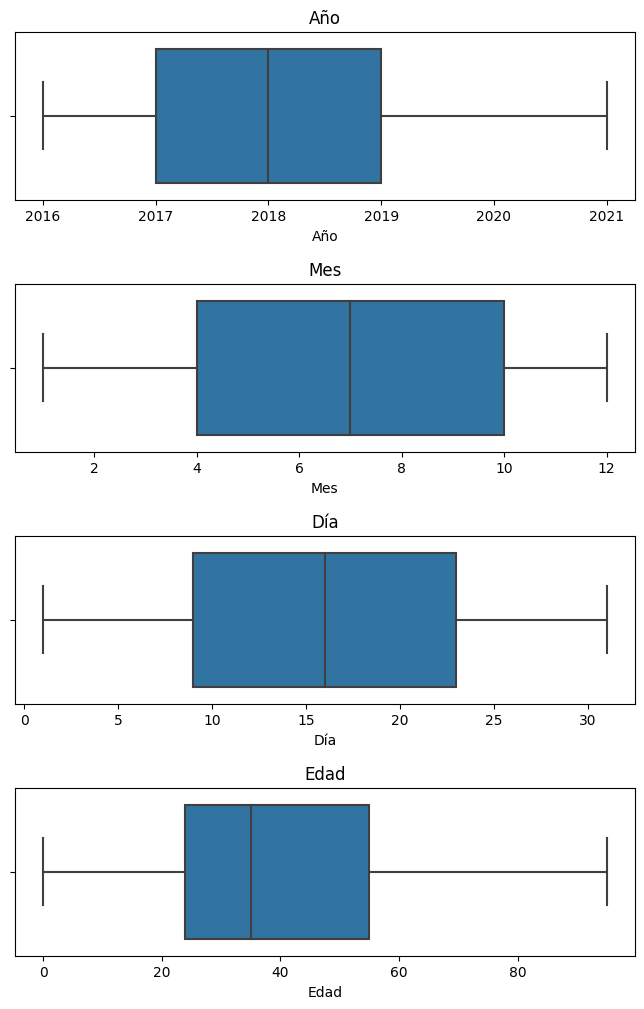

In [22]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Año', 'Mes', 'Día','Edad']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,12))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_homicidios_V, ax=ax[i])
    ax[i].set_title(col)

# 4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

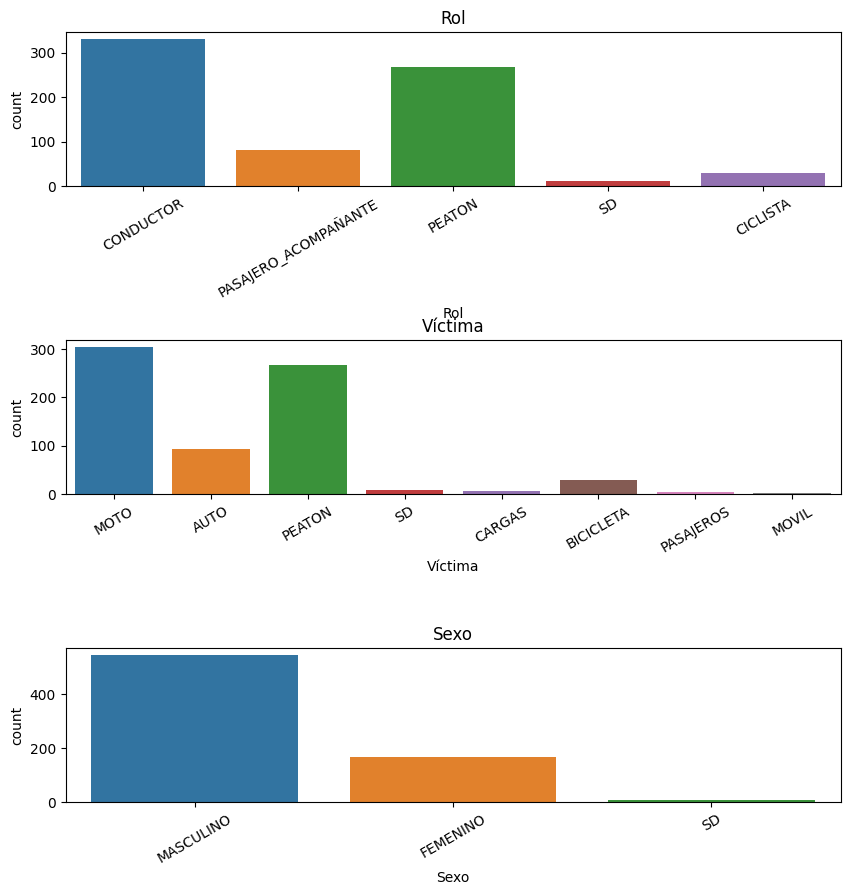

In [23]:
# Graficar los subniveles de cada variable categórica
cols_cat = [ 'Rol', 'Víctima', 'Sexo' ]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df_homicidios_V, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

# Union de los dos dataset de homicidio

In [24]:
# Se eliminan las columnas repetidas
df_homicidios_V = df_homicidios_V.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_homicidios_V.columns

Index(['Id', 'Rol', 'Sexo', 'Edad', 'Fecha fallecimiento', 'Rango edad'], dtype='object')

In [25]:
df_homicidios_M= df_homicidios_V.merge(df_homicidios_H, on="Id", how="left")
df_homicidios_M.columns

Index(['Id', 'Rol', 'Sexo', 'Edad', 'Fecha fallecimiento', 'Rango edad',
       'Num víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora completa', 'Hora',
       'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Xy (caba)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Coordenada x', 'Coordenada y',
       'Barrios', 'Día semana'],
      dtype='object')

In [26]:
df_homicidios_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Id                     717 non-null    object  
 1   Rol                    717 non-null    object  
 2   Sexo                   717 non-null    object  
 3   Edad                   717 non-null    Int64   
 4   Fecha fallecimiento    717 non-null    object  
 5   Rango edad             717 non-null    category
 6   Num víctimas           702 non-null    float64 
 7   Fecha                  702 non-null    object  
 8   Año                    702 non-null    float64 
 9   Mes                    702 non-null    float64 
 10  Día                    702 non-null    float64 
 11  Hora completa          702 non-null    object  
 12  Hora                   701 non-null    float64 
 13  Lugar del hecho        702 non-null    object  
 14  Tipo de calle          702 non-null    obj

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Hemos unido los DataSet Hechos y Victimas de Homicidios

El set de datos ya está listo para el Análisis Exploratorio.

In [27]:
# Guardar el DataFrame como un archivo CSV sin incluir el índice
df_homicidios_M.to_csv('data/homicidios_T_EDA.csv', index=False)